In [1]:
import pandas as pd
import seaborn as sns
%matplotlib notebook
housing_pre=pd.read_csv('kc_train.csv',encoding="gbk")
housing_pre.head(10)


,销售日期,销售价格,卧室数,浴室数,房屋面积,停车面积,楼层数,房屋评分,建筑面积,地下室面积,建筑年份,修复年份,纬度,经度
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172
5,20150506,248500,2,1.00,780,10064,1.0,7,780,0,1958,0,47.4913,-122.318
6,20150305,675000,4,2.50,1770,9858,1.0,8,1770,0,1971,0,47.7382,-122.287
7,20140701,730000,2,2.25,2130,4920,1.5,7,1530,600,1941,0,47.5730,-122.409
8,20140807,311000,2,1.00,860,3300,1.0,6,860,0,1903,0,47.5496,-122.279
9,20141204,660000,2,1.00,960,6263,1.0,6,960,0,1942,0,47.6646,-122.202


<IPython.core.display.Javascript object>


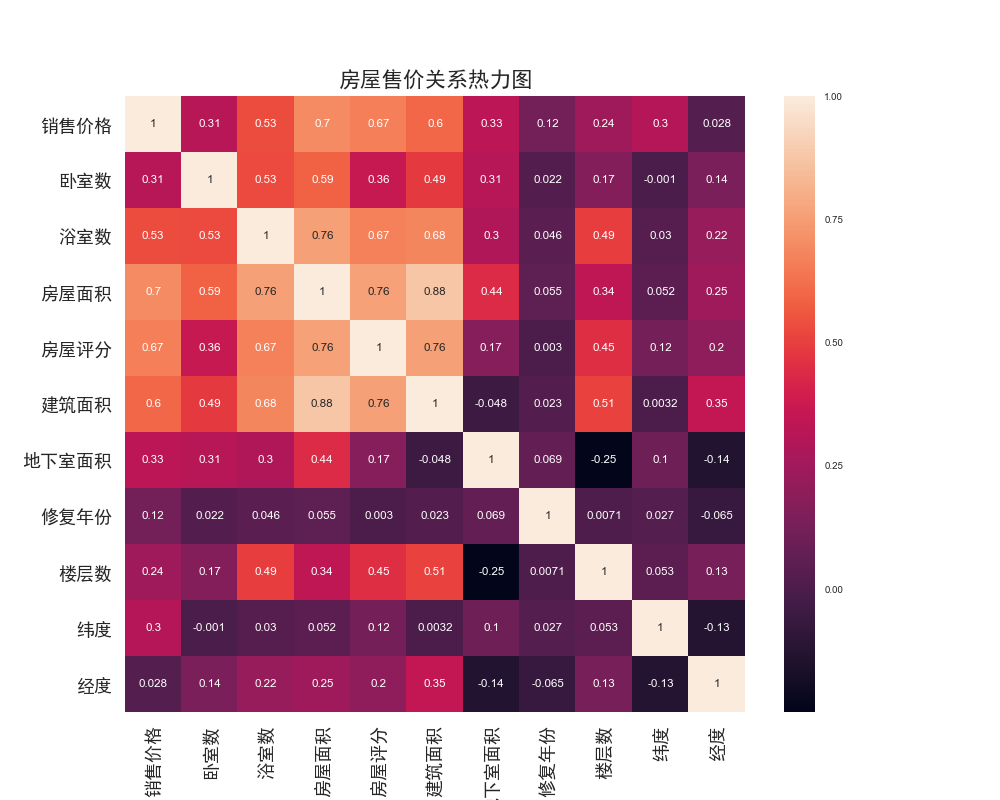

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib notebook
from matplotlib.font_manager import FontProperties  
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)  
sns.set(font=myfont.get_name())  
#sys.setdefaultencoding('utf-8')
#sys.setdefaultencoding('utf8')
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 
sns.set_context("talk")
info = ["销售价格","卧室数","浴室数","房屋面积","房屋评分","建筑面积","地下室面积","修复年份","楼层数",'纬度',
                    '经度']
f, ax= plt.subplots(figsize = (10, 8))
ax.set_title("房屋售价关系热力图")
sns.set(font_scale=0.7)
sns.heatmap(housing_pre[info].corr(),annot=True, ax=ax)


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn import neighbors
  #转换日期的数据结构
housing_pre["有无地下室"]=0
housing_pre["是否修复"]=0
housing_pre.at[housing_pre["地下室面积"]>0,"有无地下室"]=1
housing_pre.at[housing_pre["修复年份"]>0,"有无修复"]=1


features = ["卧室数","浴室数","房屋面积","停车面积","楼层数","房屋评分","建筑面积","纬度",'有无地下室',"是否修复"]

target = "销售价格"
lr = LinearRegression()
rf = RandomForestRegressor(200)#可以改变括号里的值（也就是子树的个数）来得到更优的回归效果
km=neighbors.KNeighborsRegressor()
models = [lr,rf,km]

for model in models:
    scores = cross_val_score(model, housing_pre[features], housing_pre[target], cv = 5, scoring = 'neg_mean_absolute_error')
    print(type(model).__name__, np.mean(scores))

    
X=housing_pre[features]
y=housing_pre[target]
rf.fit(X,y)
joblib.dump(rf,'rf.pkl')   #保存模型

LinearRegression -146719.115524
RandomForestRegressor -98443.1106265
KNeighborsRegressor -170097.07018


['rf.pkl']

In [4]:
import os
clf=joblib.load("rf.pkl")
housing_rslt=pd.read_csv('kc_test.csv',encoding="gbk")

housing_rslt["有无地下室"]=0
housing_rslt["是否修复"]=0
housing_rslt.at[housing_rslt["地下室面积"]>0,"有无地下室"]=1
housing_rslt.at[housing_rslt["修复年份"]>0,"有无修复"]=1
features= ["卧室数","浴室数","房屋面积","停车面积","楼层数","房屋评分","建筑面积","纬度",'有无地下室',"是否修复"]
target=["销售价格"]
test_x=housing_rslt[features]
test_y=housing_pre[target]
testy=clf.predict(test_x)
n=1
with open("b.txt","w",encoding='utf-8') as f:
    for i in testy:
        f.write(str(i)+"\n")
        print(n,i)
        n+=1

1 416977.95
2 536174.5
3 377053.245
4 584626.5
5 654134.845
6 266549.0
7 679813.27
8 510970.46
9 974865.14
10 319672.5
11 376601.545
12 536321.833333
13 331083.11
14 279109.99
15 1061984.25
16 350346.735
17 549161.92
18 362819.500417
19 608021.0
20 616427.23
21 736169.4
22 1981899.97
23 510296.18
24 266807.995
25 425563.87
26 573881.865
27 246984.3
28 355358.7
29 482983.225
30 491353.255
31 359359.505
32 257272.81
33 579262.63
34 496248.505
35 897040.6
36 323531.75
37 303623.29
38 228054.305
39 253730.3
40 474378.75
41 420081.705
42 416782.9
43 260963.25
44 2653069.9
45 473095.545
46 436249.35
47 513104.5
48 525657.295
49 324352.21
50 404493.5
51 498574.28
52 897837.99
53 287070.61
54 546950.5
55 1656471.77
56 627751.205
57 536808.5
58 457558.4
59 458595.75
60 332732.483333
61 430809.335
62 228892.0
63 982545.465
64 328524.88
65 295187.4
66 504795.625
67 356470.76
68 320707.62
69 245874.96
70 299407.1
71 948752.81
72 220417.395
73 699060.75
74 517920.805
75 914071.62
76 549639.885
77 2